# Dimensionality Reduction Exercises

## Introduction

We will be using customer data from a [Portuguese wholesale distributor](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) for clustering. This data file is called `Wholesale_Customers_Data`.

It contains the following features:

* Fresh: annual spending (m.u.) on fresh products
* Milk: annual spending (m.u.) on milk products
* Grocery: annual spending (m.u.) on grocery products
* Frozen: annual spending (m.u.) on frozen products
* Detergents_Paper: annual spending (m.u.) on detergents and paper products
* Delicatessen: annual spending (m.u.) on delicatessen products
* Channel: customer channel (1: hotel/restaurant/cafe or 2: retail)
* Region: customer region (1: Lisbon, 2: Porto, 3: Other)

In this data, the values for all spending are given in an arbitrary unit (m.u. = monetary unit).

### Prerequisite packages
pandas
numpy
sklearn
seaborn
matplotlib


## Question 1

* Import the data and check the data types.
* Drop the channel and region columns as they won't be used.
* Convert the remaining columns to floats if necessary.
* Copy this version of the data (using the `copy` method) to a variable to preserve it. We will be using it later.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from matplotlib import pyplot as plt

### Import Data and Checking Data Type

In [2]:
data_path = './data/Wholesale_Customers_Data.csv'
data = pd.read_csv(data_path)
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Drop Chanel and Region Columns
### Convert DType to Float

In [3]:
data = data.drop(['Channel', 'Region'], 1)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [4]:
data.dtypes

Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [5]:
for col in data:
    data[col] = data[col].astype('float')

data.dtypes

Fresh               float64
Milk                float64
Grocery             float64
Frozen              float64
Detergents_Paper    float64
Delicassen          float64
dtype: object

### Copy Data

In [6]:
data_original = data.copy()

## Question 2

As with the previous lesson, we need to ensure the data is scaled and (relatively) normally distributed.

* Examine the correlation and skew.
* Perform any transformations and scale data using your favorite scaling method.
* View the pairwise correlation plots of the new data.

### Correlation

In [7]:
corr = data.corr()
corr

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


### Skewness

In [8]:
data_skewness = data.skew().sort_values(ascending = False)
data_skewness

Delicassen          11.151586
Frozen               5.907986
Milk                 4.053755
Detergents_Paper     3.631851
Grocery              3.587429
Fresh                2.561323
dtype: float64

### Before Log Transform

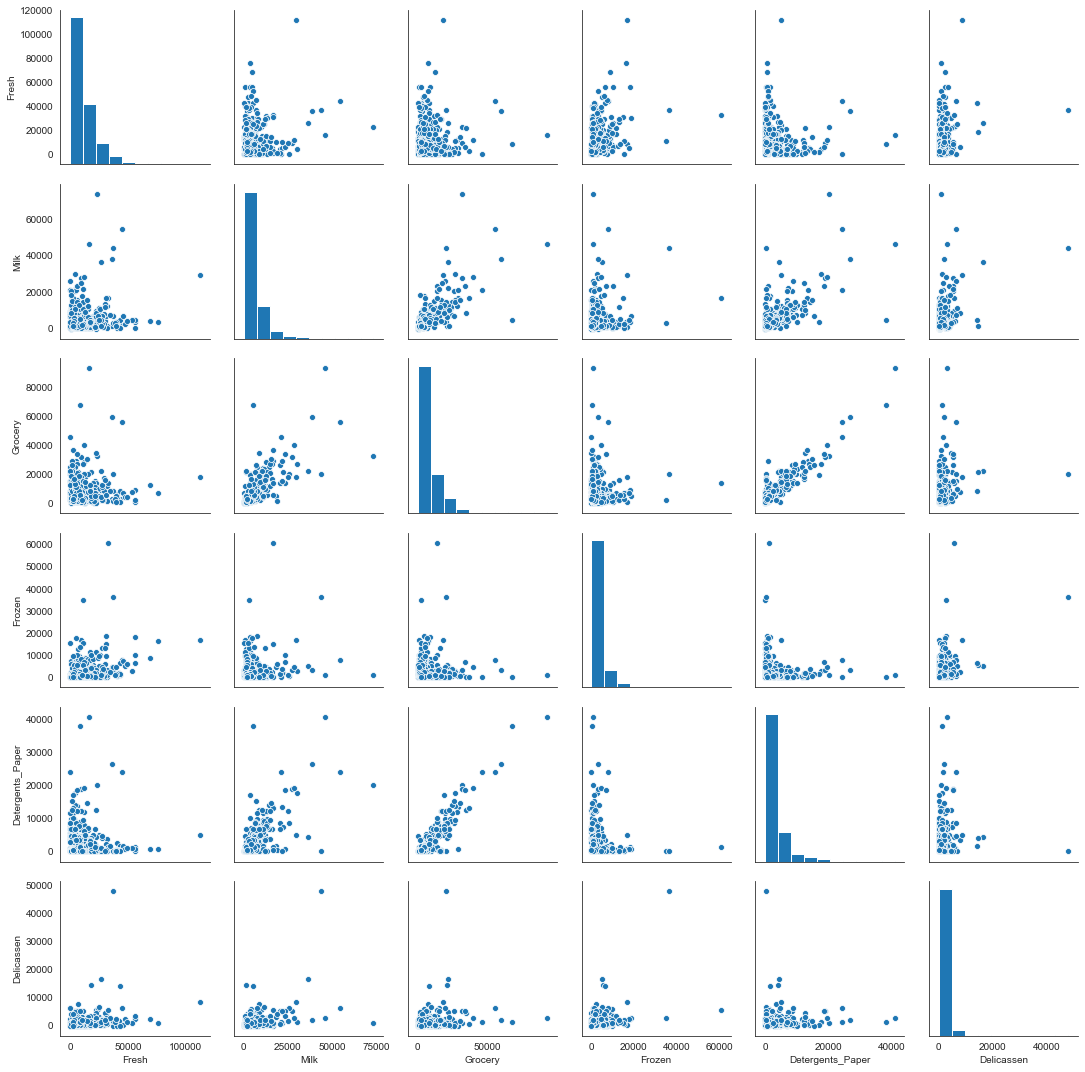

In [9]:
sns.set_style('white') # To separate chart columns
sns.pairplot(data)

### Log Transform

In [10]:
for col in data:
    data[col] = np.log1p(data[col]) # log1p = log(x+1) to make data >= 1

data.skew().sort_values(ascending = False)

Milk               -0.224063
Detergents_Paper   -0.235961
Frozen             -0.352655
Grocery            -0.674938
Delicassen         -1.091827
Fresh              -1.575326
dtype: float64

In [11]:
###  Scale Data
for col in data:
    data[col] = data[col] - data[col].min()
    data[col] = data[col] / data[col].max() * 2
    data[col] = data[col] - 1

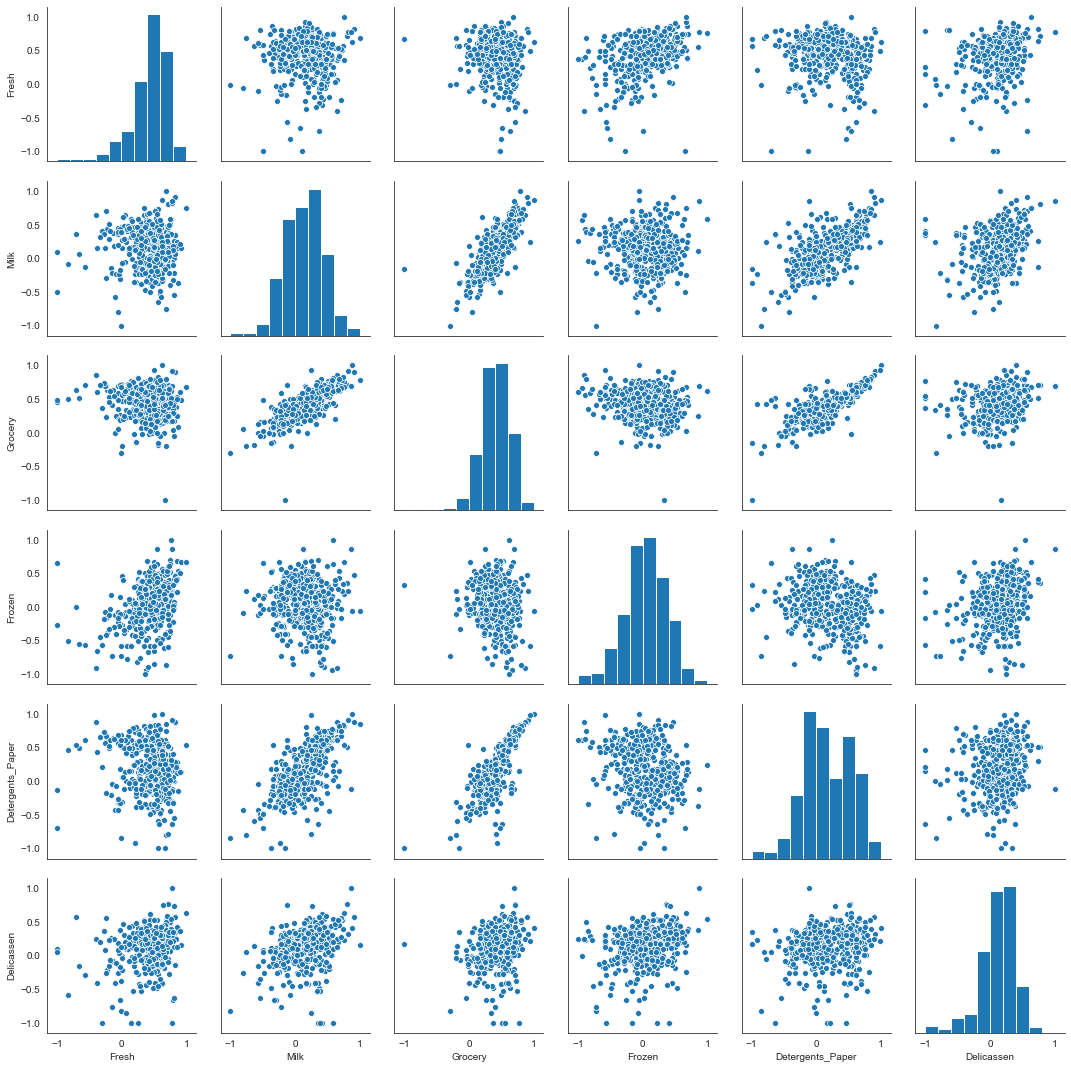

In [12]:
sns.pairplot(data)

## Question 3

* Using Scikit-learn's [pipeline function](http://scikit-learn.org/stable/modules/pipeline.html), recreate the data pre-processing scheme above (transformation and scaling) using a pipeline. If you used a non-Scikit learn function to transform the data (e.g. NumPy's log function), checkout  the custom transformer class called [`FunctionTransformer`](http://scikit-learn.org/stable/modules/preprocessing.html#custom-transformers).
* Use the pipeline to transform the original data that was stored at the end of question 1.
* Compare the results to the original data to verify that everything worked.

*Hint:* Scikit-learn has a more flexible `Pipeline` function and a shortcut version called `make_pipeline`. Either can be used. Also, if different transformations need to be performed on the data, a [`FeatureUnion`](http://scikit-learn.org/stable/modules/pipeline.html#featureunion-composite-feature-spaces) can be used.

In [13]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# The custom NumPy log transformer
log_transformer = FunctionTransformer(np.log1p)

# The pipeline
estimators = [('log1p', log_transformer), ('minmaxscale', MinMaxScaler(feature_range=(-1, 1)))]
pipeline = Pipeline(estimators)

# Convert the original data
data_pipe = pipeline.fit_transform(data_original)

c:\users\lac\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
c:\users\lac\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [14]:
(data_pipe - data).head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.0,-2.220446e-16,0.0,-2.220446e-16,2.220446e-16,2.220446e-16
1,0.0,-4.440892e-16,0.0,0.000000e+00,0.000000e+00,0.000000e+00
2,0.0,-2.220446e-16,0.0,-2.220446e-16,0.000000e+00,2.220446e-16
3,0.0,-2.220446e-16,0.0,-4.440892e-16,0.000000e+00,2.220446e-16
4,0.0,-2.220446e-16,0.0,-2.220446e-16,2.220446e-16,2.220446e-16


## Question 4

* Perform PCA with `n_components` ranging from 1 to 5. 
* Store the amount of explained variance for each number of dimensions.
* Also store the feature importance for each number of dimensions. *Hint:* PCA doesn't explicitly provide this after a model is fit, but the `components_` properties can be used to determine something that approximates importance. How you decided to do so is entirely up to you.
* Plot the explained variance and feature importances.

In [15]:
# Centralize data
for col in data:
    data[col] = data[col] - data[col].mean()

s = np.dot(data.T, data) / data.shape[0] # Covariance Matrix
s

array([[ 0.08229252, -0.00181969, -0.00842773,  0.03657392, -0.0168439 ,
         0.02024842],
       [-0.00181969,  0.09041076,  0.05055713, -0.00548135,  0.07550453,
         0.02833034],
       [-0.00842773,  0.05055713,  0.04880113, -0.01199669,  0.06515075,
         0.01459297],
       [ 0.03657392, -0.00548135, -0.01199669,  0.10895014, -0.02598336,
         0.0232871 ],
       [-0.0168439 ,  0.07550453,  0.06515075, -0.02598336,  0.13687954,
         0.01706456],
       [ 0.02024842,  0.02833034,  0.01459297,  0.0232871 ,  0.01706456,
         0.07576073]])

In [16]:
s_eig = np.linalg.eig(s)
s_eig

(array([0.24331227, 0.14825354, 0.05786385, 0.05187141, 0.01109341,
        0.03070033]),
 array([[ 0.12715368, -0.51077808, -0.60911117, -0.59228269, -0.03128527,
          0.0119883 ],
        [-0.51602135, -0.20541903, -0.00972039,  0.04431285,  0.31194884,
         -0.76951595],
        [-0.39903088, -0.05282381,  0.04890402, -0.04422832, -0.90860843,
         -0.08981637],
        [ 0.20132122, -0.69475861,  0.68673531, -0.06259633, -0.01133341,
          0.03358734],
        [-0.70370418, -0.01227765,  0.14404332, -0.29167442,  0.27553647,
          0.56824897],
        [-0.15032783, -0.45965003, -0.36625623,  0.74584795,  0.00954379,
          0.27495364]]))

In [17]:
s_eig_val = np.sort(s_eig[0])
s_eig_vec = (s_eig[1].T)[s_eig[0].argsort()][::-1].T
s_eig_val, s_eig_vec

(array([0.01109341, 0.03070033, 0.05187141, 0.05786385, 0.14825354,
        0.24331227]),
 array([[ 0.12715368, -0.51077808, -0.60911117, -0.59228269,  0.0119883 ,
         -0.03128527],
        [-0.51602135, -0.20541903, -0.00972039,  0.04431285, -0.76951595,
          0.31194884],
        [-0.39903088, -0.05282381,  0.04890402, -0.04422832, -0.08981637,
         -0.90860843],
        [ 0.20132122, -0.69475861,  0.68673531, -0.06259633,  0.03358734,
         -0.01133341],
        [-0.70370418, -0.01227765,  0.14404332, -0.29167442,  0.56824897,
          0.27553647],
        [-0.15032783, -0.45965003, -0.36625623,  0.74584795,  0.27495364,
          0.00954379]]))

In [18]:
data_rotated = np.dot(data, s_eig_vec)
data_rotated

array([[-0.45746411,  0.15476188, -0.43206056, -0.02826743, -0.0833174 ,
         0.0712482 ],
       [-0.42455299, -0.19536021, -0.00329925,  0.03537255, -0.03186828,
         0.04049598],
       [-0.43565701, -0.37763099, -0.05137251,  0.27483042,  0.0926038 ,
         0.07743573],
       ...,
       [-0.86701206, -0.06511098, -0.28268229, -0.11737926,  0.02758167,
        -0.038242  ],
       [ 0.34989453, -0.04111256, -0.25826809,  0.20951967, -0.02187322,
        -0.01310889],
       [ 0.14690962,  0.9489982 , -0.26893131, -0.24996092, -0.10602141,
         0.02288899]])

In [19]:
corr = np.corrcoef(data_rotated.T)
corr

array([[ 1.00000000e+00, -1.38167646e-16, -3.40245095e-17,
        -3.29882590e-17,  2.64941920e-16, -4.99027886e-16],
       [-1.38167646e-16,  1.00000000e+00, -4.41332975e-16,
        -2.81979194e-16,  2.76767594e-16, -6.31522022e-16],
       [-3.40245095e-17, -4.41332975e-16,  1.00000000e+00,
        -7.23085267e-16,  7.18395553e-17,  8.88852203e-16],
       [-3.29882590e-17, -2.81979194e-16, -7.23085267e-16,
         1.00000000e+00, -6.07006370e-16, -4.68080949e-16],
       [ 2.64941920e-16,  2.76767594e-16,  7.18395553e-17,
        -6.07006370e-16,  1.00000000e+00,  3.75998556e-17],
       [-4.99027886e-16, -6.31522022e-16,  8.88852203e-16,
        -4.68080949e-16,  3.75998556e-17,  1.00000000e+00]])

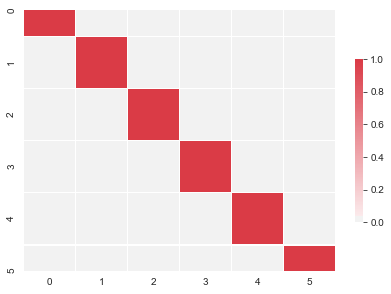

In [20]:
f, ax = plt.subplots(figsize=(7, 6))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [21]:
total_variance = np.trace(data.cov())

In [22]:
total_variance

0.5443319222734744

In [23]:
np.trace(np.cov(data_rotated.T))

0.5443319222734744

In [24]:
cov = np.cov(data_rotated.T)
cov

array([[ 2.43866510e-01, -2.63014111e-17, -4.04637093e-18,
        -3.71444207e-18,  2.29505101e-17, -2.59852883e-17],
       [-2.63014111e-17,  1.48591243e-01, -4.09695057e-17,
        -2.47840220e-17,  1.87144656e-17, -2.56691656e-17],
       [-4.04637093e-18, -4.09695057e-17,  5.79956574e-02,
        -3.97050148e-17,  3.03477820e-18,  2.25711629e-17],
       [-3.71444207e-18, -2.47840220e-17, -3.97050148e-17,
         5.19895697e-02, -2.42782256e-17, -1.12539692e-17],
       [ 2.29505101e-17,  1.87144656e-17,  3.03477820e-18,
        -2.42782256e-17,  3.07702600e-02,  6.95470004e-19],
       [-2.59852883e-17, -2.56691656e-17,  2.25711629e-17,
        -1.12539692e-17,  6.95470004e-19,  1.11186814e-02]])

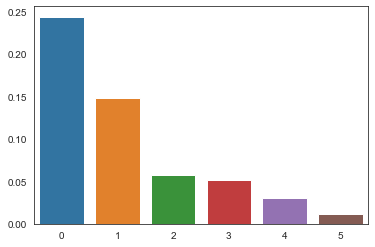

In [25]:
sns.barplot(list(range(6)), cov.diagonal())

### Percentage of each PC

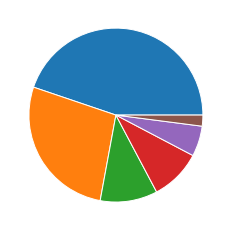

In [26]:
pie = cov.diagonal() / total_variance

plt.pie(pie)
plt.show()

## Question 5

* Fit a `KernelPCA` model with `kernel='rbf'`. You can choose how many components and what values to use for the other parameters.
* If you want to tinker some more, use `GridSearchCV` to tune the parameters of the `KernelPCA` model. 

The second step is tricky since grid searches are generally used for supervised machine learning methods and rely on scoring metrics, such as accuracy, to determine the best model. However, a custom scoring function can be written for `GridSearchCV`, where larger is better for the outcome of the scoring function. 

What would such a metric involve for PCA? What about percent of explained variance? Or perhaps the negative mean squared error on the data once it has been transformed and then inversely transformed?



### Example

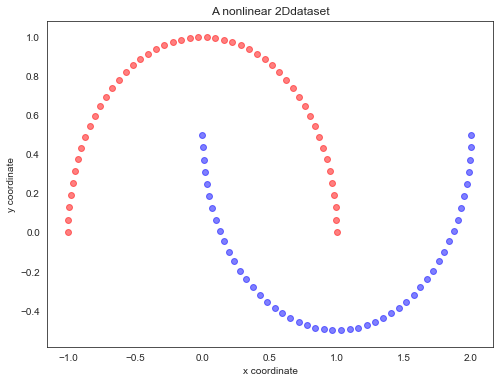

In [27]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('A nonlinear 2Ddataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

### Linear PCA

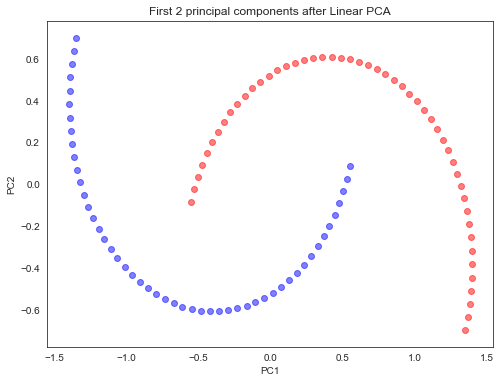

In [28]:
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Project to PC1 and PC2

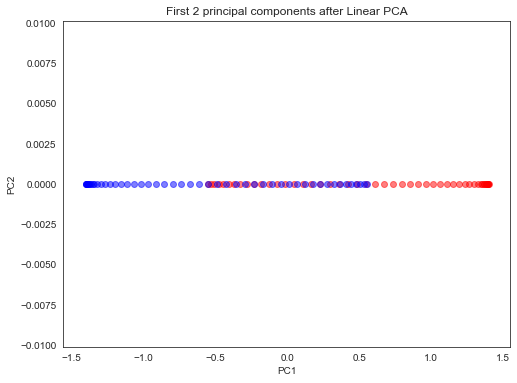

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(X_spca[y==0, 0], np.zeros((50)), color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], np.zeros((50)), color='blue', alpha=0.5)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

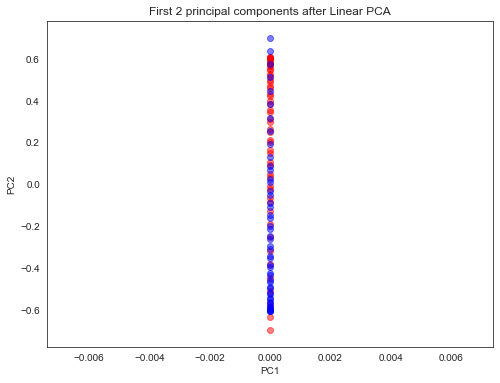

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(np.zeros((50)), X_spca[y==0, 1], color='red', alpha=0.5)
plt.scatter(np.zeros((50)), X_spca[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Gaussian RBF kernel PCA

In [31]:
from scipy.linalg import eigh
from scipy import exp

def rbf_kpca(x, gamma, n_components):
    
    ## Matrix of Squared Euclide Distance
    mat_sq_dists = np.array([[np.linalg.norm(i-j) ** 2 for j in x] for i in x])
    
    ## Kernal matrix
    K = exp(-gamma * mat_sq_dists)
    
    n = K.shape[0]
    
    # Centralize the kernal matrix
    one_n = np.ones((n,n)) / n
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    eigvals, eigvecs = eigh(K)
    X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))
    return X_pc

c:\users\lac\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


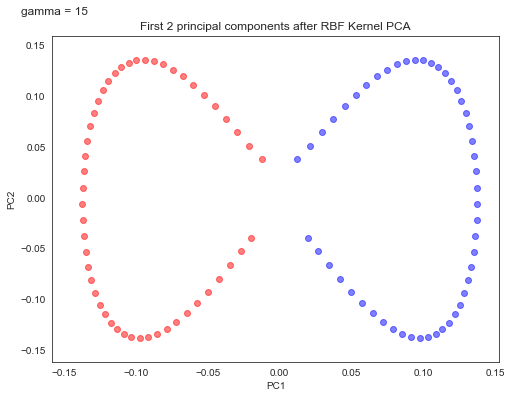

In [43]:
X_pc = rbf_kpca(X, gamma=15, n_components=3)

plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0], X_pc[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_pc[y==1, 0], X_pc[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after RBF Kernel PCA')
plt.text(-0.18, 0.18, 'gamma = 15', fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

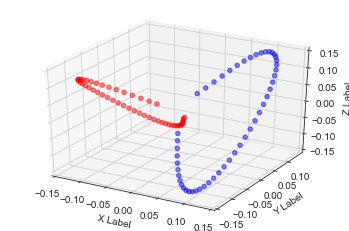

In [46]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X_pc[y==0, 0], X_pc[y==0, 1], X_pc[y==0, 2], color='red', alpha=0.5)
ax.scatter(X_pc[y==1, 0], X_pc[y==1, 1], X_pc[y==1, 2], color='blue', alpha=0.5)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

c:\users\lac\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


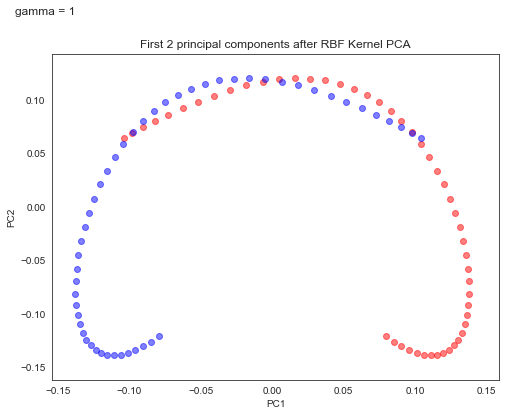

In [50]:
X_pc = rbf_kpca(X, gamma=1, n_components=3)

plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0], X_pc[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_pc[y==1, 0], X_pc[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after RBF Kernel PCA')
plt.text(-0.18, 0.18, 'gamma = 1', fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

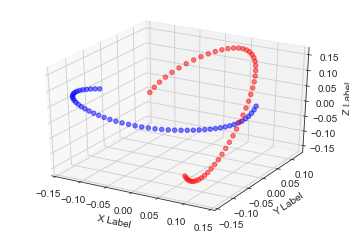

In [51]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X_pc[y==0, 0], X_pc[y==0, 1], X_pc[y==0, 2], color='red', alpha=0.5)
ax.scatter(X_pc[y==1, 0], X_pc[y==1, 1], X_pc[y==1, 2], color='blue', alpha=0.5)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

c:\users\lac\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


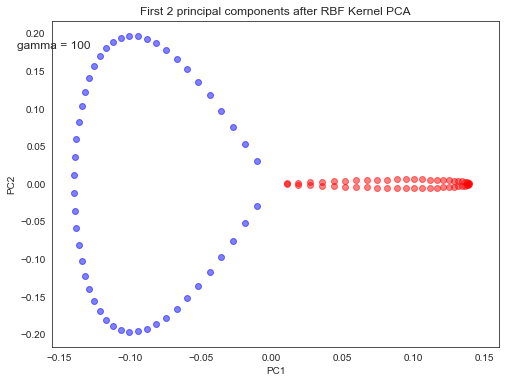

In [57]:
X_pc = rbf_kpca(X, gamma=100, n_components=3)

plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0], X_pc[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_pc[y==1, 0], X_pc[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after RBF Kernel PCA')
plt.text(-0.18, 0.18, 'gamma = 100', fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

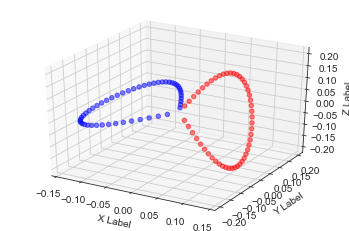

In [58]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X_pc[y==0, 0], X_pc[y==0, 1], X_pc[y==0, 2], color='red', alpha=0.5)
ax.scatter(X_pc[y==1, 0], X_pc[y==1, 1], X_pc[y==1, 2], color='blue', alpha=0.5)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

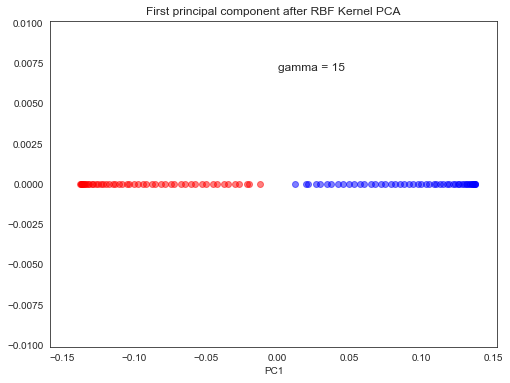

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0], np.zeros((50)), color='red', alpha=0.5)
plt.scatter(X_pc[y==1, 0], np.zeros((50)), color='blue', alpha=0.5)

plt.title('First principal component after RBF Kernel PCA')
plt.text(0, 0.007, 'gamma = 15', fontsize=12)
plt.xlabel('PC1')
plt.show()

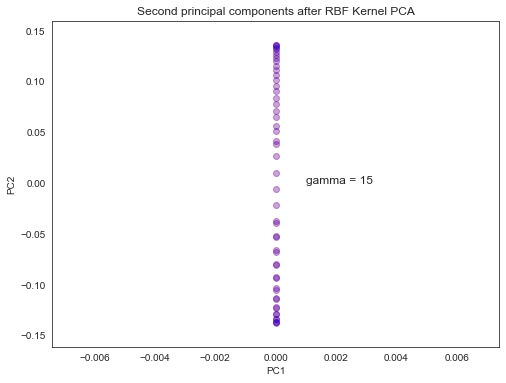

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(np.zeros((50)), X_pc[y==0, 1], color='red', alpha=0.2)
plt.scatter(np.zeros((50)), X_pc[y==1, 1], color='blue', alpha=0.2)

plt.title('Second principal components after RBF Kernel PCA')
plt.text(0.001, 0, 'gamma = 15', fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Apply to the problem

In [35]:
param_grid = {'gamma':[0.001, 0.01, 0.05, 0.1, 0.5, 1.0], 'n_components': [2, 3, 4]}

In [36]:
### GRID SEARCH

grid = np.zeros(18).reshape(6,3)

param_grid['gamma']
param_grid['n_components']

for gamma in range(6):
    for n_components in range(3):
        rbf_kpca(data, param_grid['gamma'][gamma], param_grid['n_components'][n_components])
        

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [37]:
X_pc = rbf_kpca(data.T, 1, 6)

plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0], X_pc[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_pc[y==1, 0], X_pc[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after RBF Kernel PCA')
plt.text(-0.18, 0.18, 'gamma = 15', fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

c:\users\lac\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


IndexError: boolean index did not match indexed array along dimension 0; dimension is 440 but corresponding boolean dimension is 100

<Figure size 576x432 with 0 Axes>

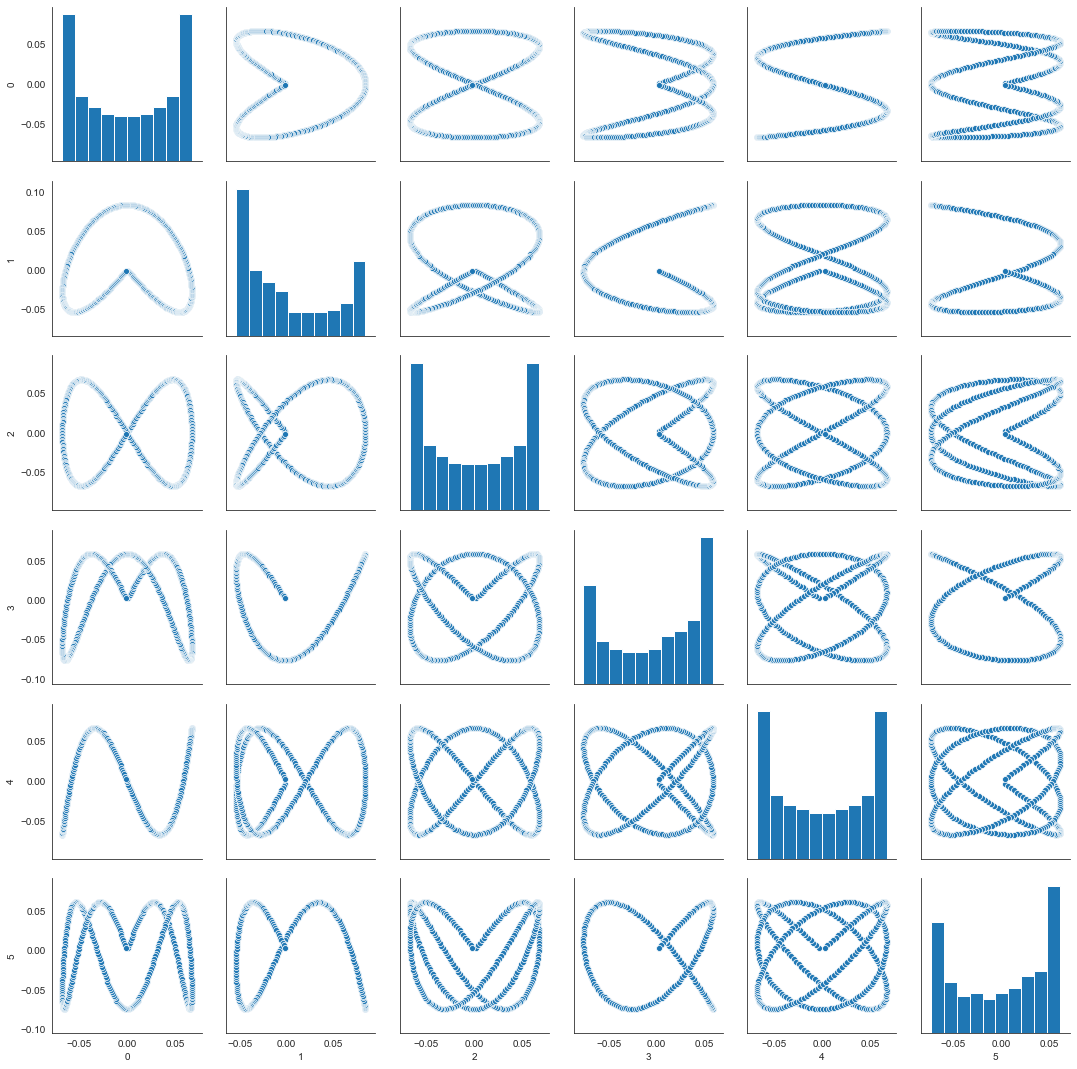

In [38]:
sns.pairplot(pd.DataFrame(data=X_pc))

## Question 6

Let's explore how our model accuracy may change if we include a `PCA` in our model building pipeline. Let's plan to use sklearn's `Pipeline` class and create a pipeline that has the following steps:
<ol>
  <li>A scaler</li>
  <li>`PCA(n_components=n)`</li>
  <li>`LogisticRegression`</li>
</ol>

* Load the Human Activity data from the datasets.
* Write a function that takes in a value of `n` and makes the above pipeline, then predicts the "Activity" column over a 5-fold StratifiedShuffleSplit, and returns the average test accuracy
* For various values of n, call the above function and store the average accuracies.
* Plot the average accuracy by number of dimensions.

In [ ]:
data = pd.read_csv('./data/Human_Activity_Recognition_Using_Smartphones_Data.csv')
data.head()

In [ ]:
data.shape

# Question 7
Use a different scaler (MinMaxScaler) and try the PCA and observe how the Average accuracy changes with dimension count

# Question 8

Use Randomized PCA and draw your observations on how the Average Accuracy changed with number of Dimensions

# Question 9
Try using Robust Scaler and try the PCA and observe how the Average accuracy changes with dimension count